In [1]:
%config Completer.use_jedi = False

In [2]:
addr = "http://localhost:6006/data/plugin/scalars/scalars?tag=rollout/ep_rew_mean&run=DQN_LR0.010_H1_32_H2_16_BS_5000_GS_10_2_1&format=json"

In [3]:
import requests

In [4]:
vals = [[0.01,32,32,5000,10],[0.01,64,64,1000,10],[0.01,64,64,5000,10],[0.001,64,64,5000,10],[0.01,32,16,5000,10]]

In [5]:
results = {}

for v in vals:
    for i in range(5):
        modID=idstr = "DQN_LR%.3f_H1_%d_H2_%d_BS_%d_GS_%d_%d_1"%(*v,i)
        print("getting",modID)
        addr = "http://localhost:6006/data/plugin/scalars/scalars?tag=rollout/ep_rew_mean&run=%s&format=json"%idstr
        resp = requests.get(url=addr)
        data = resp.json()
        if not str(v) in results:
            results[str(v)]=[]
        results[str(v)].append(data)
        

getting DQN_LR0.010_H1_32_H2_32_BS_5000_GS_10_0_1
getting DQN_LR0.010_H1_32_H2_32_BS_5000_GS_10_1_1
getting DQN_LR0.010_H1_32_H2_32_BS_5000_GS_10_2_1
getting DQN_LR0.010_H1_32_H2_32_BS_5000_GS_10_3_1
getting DQN_LR0.010_H1_32_H2_32_BS_5000_GS_10_4_1
getting DQN_LR0.010_H1_64_H2_64_BS_1000_GS_10_0_1
getting DQN_LR0.010_H1_64_H2_64_BS_1000_GS_10_1_1
getting DQN_LR0.010_H1_64_H2_64_BS_1000_GS_10_2_1
getting DQN_LR0.010_H1_64_H2_64_BS_1000_GS_10_3_1
getting DQN_LR0.010_H1_64_H2_64_BS_1000_GS_10_4_1
getting DQN_LR0.010_H1_64_H2_64_BS_5000_GS_10_0_1
getting DQN_LR0.010_H1_64_H2_64_BS_5000_GS_10_1_1
getting DQN_LR0.010_H1_64_H2_64_BS_5000_GS_10_2_1
getting DQN_LR0.010_H1_64_H2_64_BS_5000_GS_10_3_1
getting DQN_LR0.010_H1_64_H2_64_BS_5000_GS_10_4_1
getting DQN_LR0.001_H1_64_H2_64_BS_5000_GS_10_0_1
getting DQN_LR0.001_H1_64_H2_64_BS_5000_GS_10_1_1
getting DQN_LR0.001_H1_64_H2_64_BS_5000_GS_10_2_1
getting DQN_LR0.001_H1_64_H2_64_BS_5000_GS_10_3_1
getting DQN_LR0.001_H1_64_H2_64_BS_5000_GS_10_4_1


In [6]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [95]:
def plotT(k,t):
    ys = []
    xs = []
    for i in range(15):
        cy = []
        for run in range(5):
            cy.append(t[run][i][2])
        ys.append(cy)
    for i in range(15):
        xs.append(t[0][i][1])

    ys = np.array(ys)
    yss=np.std(ys,axis=1)
    ym = np.mean(ys,axis=1)
    lablist = eval(k)[:-1]
    print(lablist)
    labs = "LR:%.3f H1,H2: %d,%d BS: %d"%tuple(lablist)
    
    print(k,'final:%.2f  %.2f'%(ym[-1],yss[-1]))
    print("%.3f & %d & %d & %d  & %.2f & %.2f\\\\"%(*lablist, ym[-1],yss[-1]))
    plt.errorbar(xs,ym,yerr=yss,label=labs)

In [96]:
import matplotlib as mpl


[0.01, 32, 32, 5000]
[0.01, 32, 32, 5000, 10] final:39.47  4.10
0.010 & 32 & 32 & 5000  & 39.47 & 4.10\\
[0.01, 64, 64, 1000]
[0.01, 64, 64, 1000, 10] final:43.30  0.78
0.010 & 64 & 64 & 1000  & 43.30 & 0.78\\
[0.01, 64, 64, 5000]
[0.01, 64, 64, 5000, 10] final:44.16  0.59
0.010 & 64 & 64 & 5000  & 44.16 & 0.59\\
[0.001, 64, 64, 5000]
[0.001, 64, 64, 5000, 10] final:4.63  2.94
0.001 & 64 & 64 & 5000  & 4.63 & 2.94\\
[0.01, 32, 16, 5000]
[0.01, 32, 16, 5000, 10] final:20.79  13.23
0.010 & 32 & 16 & 5000  & 20.79 & 13.23\\


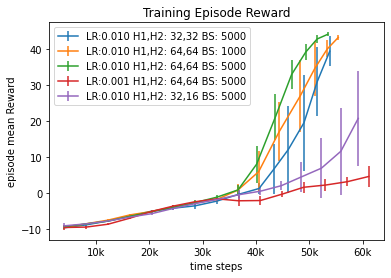

In [98]:
for  k in results.keys():
    t = results[k]
    plotT(k,t)
    plt.legend()
    plt.title("Training Episode Reward")
    plt.xlabel("time steps")
    plt.ylabel("episode mean Reward")
    plt.xticks(ticks=[10e3,20e3,30e3,40e3,50e3,60e3],labels=["10k","20k","30k","40k","50k","60k"])
#     plt.axes().xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('%d'))
plt.savefig("results_ep_rew.png")

In [63]:
[results["[0.01, 32, 32, 5000, 10]"][2][i][1] for i in range(18)]

[4040,
 8131,
 12222,
 16313,
 20404,
 24444,
 28535,
 32626,
 36711,
 40808,
 44848,
 48881,
 52654,
 55282,
 57468,
 59339,
 61203,
 63101]

In [78]:
len(results["[0.01, 32, 32, 5000, 10]"][1])

19

In [79]:
[results["[0.01, 32, 32, 5000, 10]"][4][i][1] for i in range(18)]

IndexError: list index out of range

In [55]:
results["[0.01, 32, 32, 5000, 10]"][4]

[[1628933797.9212346, 4040, -9.970539093017578],
 [1628934023.2733064, 8131, -9.197489738464355],
 [1628934244.5402043, 12222, -7.6385297775268555],
 [1628934466.9648535, 16313, -6.351342678070068],
 [1628934688.5007339, 20404, -5.194484710693359],
 [1628934893.9689403, 24444, -5.308953762054443],
 [1628935117.844196, 28535, -4.739243507385254],
 [1628935342.320211, 32626, -2.080033540725708],
 [1628935566.8846107, 36717, 0.07932295650243759],
 [1628935789.7841704, 40808, -0.22178998589515686],
 [1628935992.564059, 44809, 0.8575507402420044],
 [1628936216.130181, 48939, 1.7173538208007812],
 [1628936446.719518, 53030, 0.7446569204330444],
 [1628936640.998166, 56624, 14.834708213806152],
 [1628936765.654, 59081, 31.874547958374023],
 [1628936881.9595397, 61215, 43.8070068359375],
 [1628936973.5657861, 63013, 45.22650909423828]]